In [1]:
import pandas
import math

from SPTools import generateVariableSets, printVariableSets, addCustomVariableSet, testVariableSets

In [2]:
data = pandas.read_csv('data.csv', nrows=100000)
data = data[data.apply(lambda row: row['has_MCParticle'] and row['has_MCParticle_not_electron'], axis=1)]

data['seed_p_log'] = data.apply(lambda row: math.log(float(row['seed_p'])), axis=1)
data['seed_pt_log'] = data.apply(lambda row: math.log(float(row['seed_pt'])), axis=1)
data['seed_r'] = data.apply(lambda row: math.sqrt(float(row['seed_x']) * float(row['seed_x']) + float(row['seed_y']) * float(row['seed_y'])), axis=1)
data['seed_angle'] = data.apply(lambda row: math.atan(float(row['seed_y']) / float(row['seed_x'])), axis=1)
data['seed_pseudorapidity'] = data.apply(lambda row: math.atanh(float(row['seed_pt']) / float(row['seed_p'])), axis=1)

In [3]:
variables_to_use = ['seed_nLHCbIDs', 'seed_nbIT', 'seed_nLayers', 'seed_x', 'seed_y', 'seed_tx', 'seed_ty', 'seed_mva_value', 'seed_p_log', 'seed_pt_log', 'seed_r', 'seed_angle', 'seed_pseudorapidity']

signal_data = data[data.apply(lambda row: row['is_downstream_reconstructible'], axis=1)][variables_to_use]

background_data = data[data.apply(lambda row: not row['is_downstream_reconstructible'], axis=1)][variables_to_use]


Generating variable sets using:
['Variables:', {'seed_pt_log', 'seed_r', 'seed_ty', 'seed_angle', 'seed_x', 'seed_nLayers', 'seed_nbIT', 'seed_pseudorapidity', 'seed_nLHCbIDs', 'seed_p_log', 'seed_y', 'seed_mva_value', 'seed_tx'}]
['Pearson coefficient thresholds:', {0.1, 0.25, 0.3, 0.2, 0.15, 0.35, 0.4, 0.45, 0.5, 0.55, 0.65, 0.75, 0.85, 0.9, 0.7, 0.8, 0.95, 0.6}]
['SP cutoff values:', {2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58}]


All variables sorted by separation:
[100.0, 'seed_nLayers']
[99.88, 'seed_nbIT']
[99.19, 'seed_nLHCbIDs']
[63.94, 'seed_mva_value']
[33.36, 'seed_r']
[32.01, 'seed_y']
[28.9, 'seed_ty']
[24.12, 'seed_pseudorapidity']
[20.04, 'seed_x']
[19.78, 'seed_angle']
[19.16, 'seed_tx']
[15.26, 'seed_pt_log']
[11.4, 'seed_p_log']




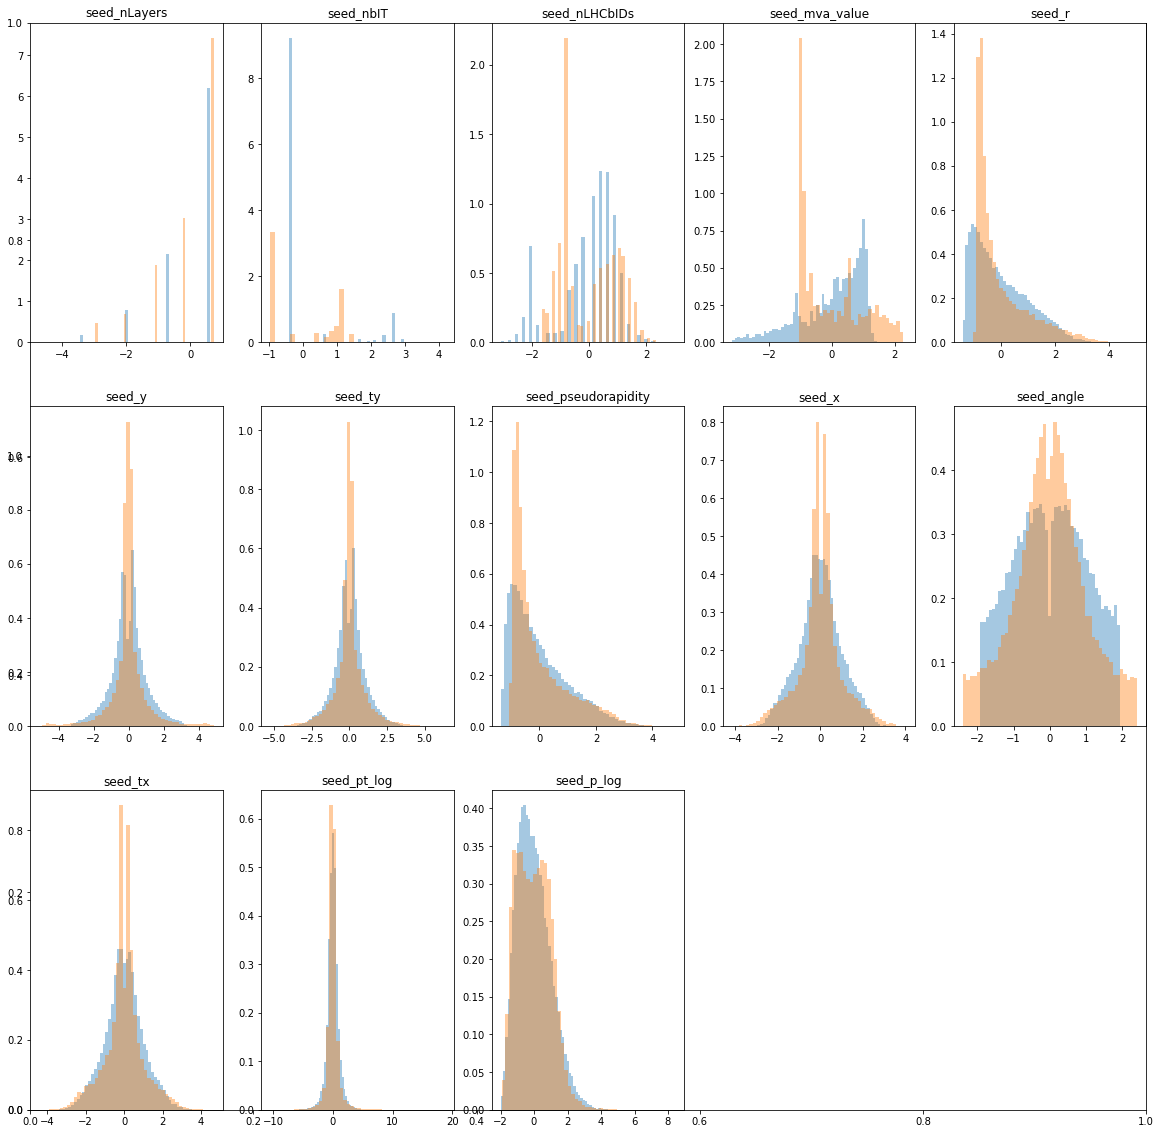

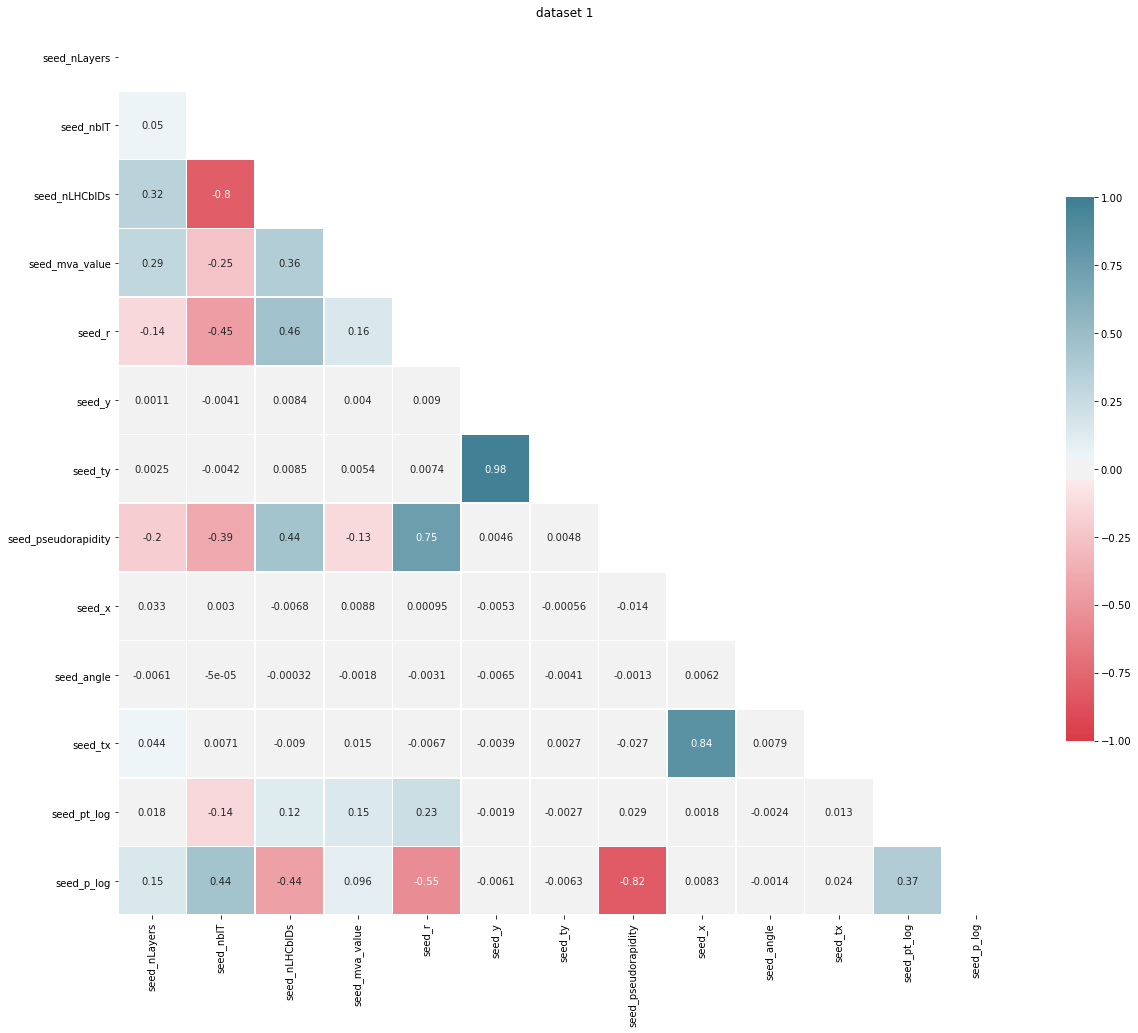

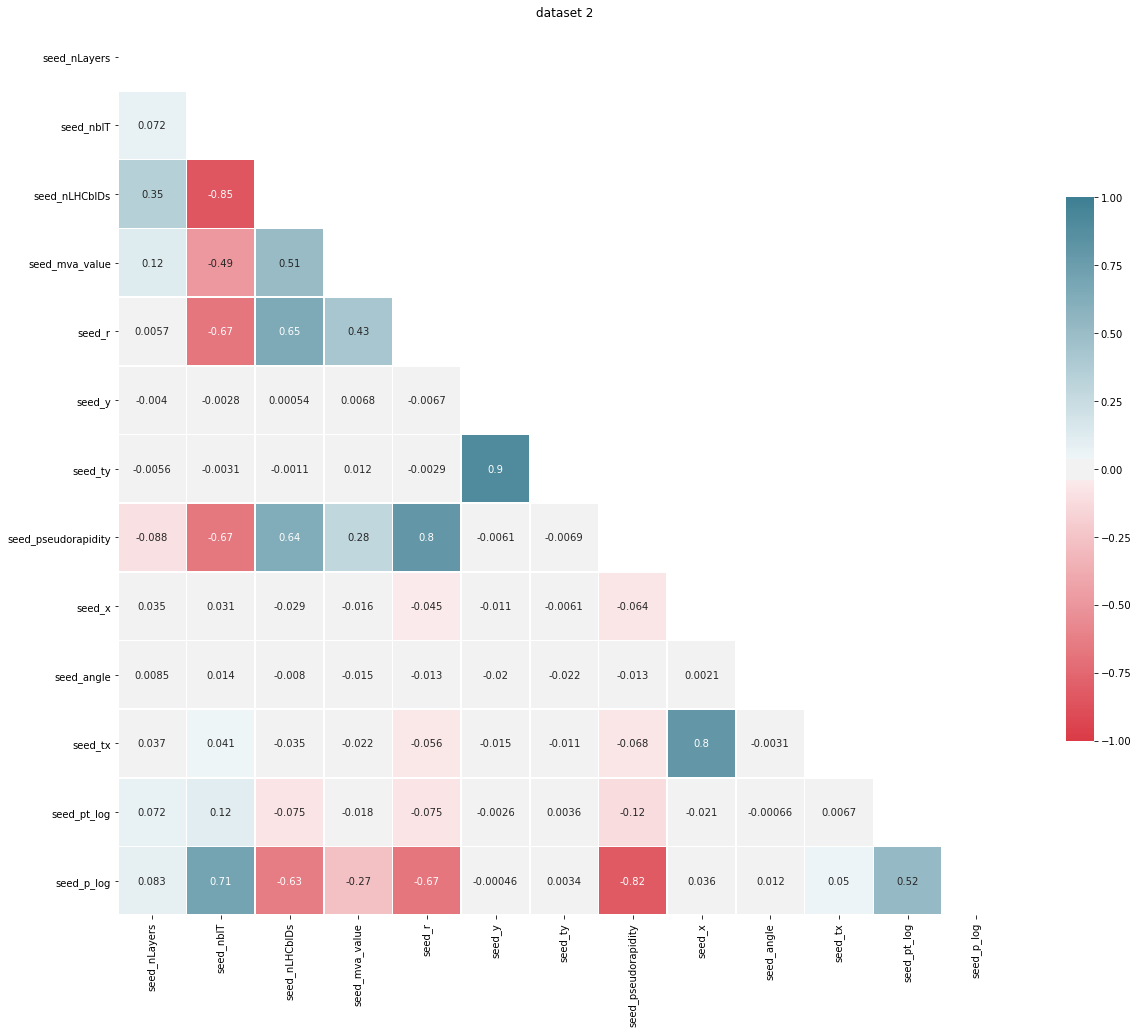

Generated 29 variable sets.
{'variable names': ('seed_nLayers', 'seed_nbIT', 'seed_nLHCbIDs', 'seed_mva_value', 'seed_r', 'seed_y', 'seed_ty', 'seed_pseudorapidity', 'seed_x', 'seed_angle', 'seed_tx', 'seed_pt_log', 'seed_p_log'), 'separation values': (100.0, 99.88, 99.19, 63.94, 33.36, 32.01, 28.9, 24.12, 20.04, 19.78, 19.16, 15.26, 11.4), 'variable sets': [{'pearson threshold': 1.0, 'cutoff value': 0, 'number of variables': 13, 'mask': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])}, {'pearson threshold': 0.9, 'cutoff value': 10, 'number of variables': 12, 'mask': array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True])}, {'pearson threshold': 0.85, 'cutoff value': 10, 'number of variables': 11, 'mask': array([ True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True])}, {'pearson threshold': 0.9, 'cutoff value': 14, 'number of variables':

In [4]:
variable_sets = generateVariableSets(signal_data, background_data, verbose=True)

In [5]:
addCustomVariableSet(variable_sets, 'custom set test', {'seed_x', 'seed_y', 'seed_angle'})

In [6]:
printVariableSets(variable_sets)

Full list of variables:
[100.0, 'seed_nLayers']
[99.88, 'seed_nbIT']
[99.19, 'seed_nLHCbIDs']
[63.94, 'seed_mva_value']
[33.36, 'seed_r']
[32.01, 'seed_y']
[28.9, 'seed_ty']
[24.12, 'seed_pseudorapidity']
[20.04, 'seed_x']
[19.78, 'seed_angle']
[19.16, 'seed_tx']
[15.26, 'seed_pt_log']
[11.4, 'seed_p_log']


Variable sets (29):

['pearson threshold', 1.0]
['cutoff value', 0]
['number of variables', 13]
['variables:']
[100.0, 'seed_nLayers']
[99.88, 'seed_nbIT']
[99.19, 'seed_nLHCbIDs']
[63.94, 'seed_mva_value']
[33.36, 'seed_r']
[32.01, 'seed_y']
[28.9, 'seed_ty']
[24.12, 'seed_pseudorapidity']
[20.04, 'seed_x']
[19.78, 'seed_angle']
[19.16, 'seed_tx']
[15.26, 'seed_pt_log']
[11.4, 'seed_p_log']



['pearson threshold', 0.9]
['cutoff value', 10]
['number of variables', 12]
['variables:']
[100.0, 'seed_nLayers']
[99.88, 'seed_nbIT']
[99.19, 'seed_nLHCbIDs']
[63.94, 'seed_mva_value']
[33.36, 'seed_r']
[32.01, 'seed_y']
[24.12, 'seed_pseudorapidity']
[20.04, 'seed_x']
[19.78, 'seed_angle'

leave only custom set for testing

In [7]:
variable_sets['variable sets'] = []

In [8]:
print(variable_sets)

{'variable names': ('seed_nLayers', 'seed_nbIT', 'seed_nLHCbIDs', 'seed_mva_value', 'seed_r', 'seed_y', 'seed_ty', 'seed_pseudorapidity', 'seed_x', 'seed_angle', 'seed_tx', 'seed_pt_log', 'seed_p_log'), 'separation values': (100.0, 99.88, 99.19, 63.94, 33.36, 32.01, 28.9, 24.12, 20.04, 19.78, 19.16, 15.26, 11.4), 'variable sets': [], 'custom sets': [{'name': 'custom set test', 'number of variables': 3, 'mask': array([False, False, False, False, False,  True, False, False,  True,
        True, False, False, False])}]}


In [9]:
testVariableSets(signal_data, background_data, variable_sets, verbose=True)

seed_nLHCbIDs  seed_nbIT  seed_nLayers       seed_x      seed_y  \
0                 24          0            12  -393.699553 -284.193871   
1                 24          0            12  -834.004914 -270.235334   
2                 22          0            12  1082.763604 -285.861222   
3                 18          0            10   354.869485 -429.609191   
4                 18          0            11  -651.661886  -61.990891   
...              ...        ...           ...          ...         ...   
73547             14          9            12   428.100559  -17.914790   
73548              8          8             8   -81.985837   68.062019   
73549             21          0            12  -314.799817 -270.285926   
73550             21          0            12   245.707434 -234.577848   
73551             20          0            11   577.655794  -54.940449   

        seed_tx   seed_ty  seed_mva_value  seed_p_log  seed_pt_log  \
0     -0.129122 -0.037920        0.801061    9.2

In [10]:
print(variable_sets['custom sets'][0]['metrics'])

{'accuracy': 0.71184826, 'loss': 0.5708116568550523, 'roc': (array([0.        , 0.        , 0.        , ..., 0.99844811, 0.99844811,
       1.        ]), array([0.00000000e+00, 1.04646296e-04, 2.30221850e-03, ...,
       9.99790707e-01, 1.00000000e+00, 1.00000000e+00]), array([1.960941  , 0.96094096, 0.9538064 , ..., 0.20720659, 0.19815086,
       0.01660734], dtype=float32)), 'roc integral': 0.7282836505337469, 'confusion matrix': array([[0.11066549, 0.23975257],
       [0.05397322, 0.59560873]]), 'classification accuracy': 0.7062742165726328}


In [13]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

Text(0.5, 1.0, 'test confusion matrix')

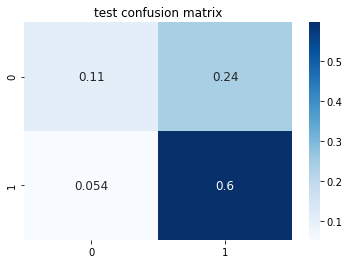

In [19]:
cfm = pd.DataFrame(variable_sets['custom sets'][0]['metrics']['confusion matrix'], range(2),range(2))
sn.heatmap(cfm, annot=True,annot_kws={"size": 12}, cmap=plt.cm.Blues).set_title("test confusion matrix")

Text(0.5, 1.0, 'integral = 0.7282836505337469')

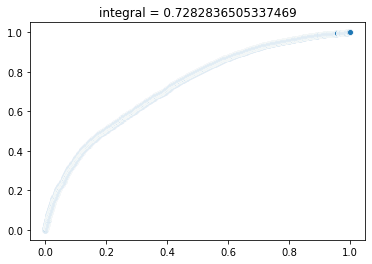

In [22]:
sn.scatterplot(variable_sets['custom sets'][0]['metrics']['roc'][0], variable_sets['custom sets'][0]['metrics']['roc'][1]).set_title("integral = {0}".format(variable_sets['custom sets'][0]['metrics']['roc integral']))